### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [86]:
auto_data = pd.read_csv("merc.csv")
auto_data_dummy = pd.concat([auto_data.drop(['model','transmission','fuelType'], axis=1), 
                             pd.get_dummies(auto_data['model']),
                             pd.get_dummies(auto_data['transmission']),
                             pd.get_dummies(auto_data['fuelType'])
                            ], axis = 1)
auto_data_dummy

,year,price,mileage,tax,mpg,engineSize,A Class,B Class,C Class,CL Class,...,220,230,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2005,5200,63000,325,32.1,1.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2017,34948,27000,20,61.4,2.1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,61948,16000,325,30.4,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2016,73948,4000,325,30.1,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
13115,2020,24699,2500,145,55.4,2.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
13116,2019,30999,11612,145,41.5,2.1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13117,2019,37990,2426,145,45.6,2.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [87]:
X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

errors = pd.DataFrame(data={'method': [], 'rmse': [], 'mae': [] })

# Линейная регрессия

In [88]:
lr = LinearRegression()

lr.fit(X_train_scaled, Y_train)
lr_predictions = lr.predict(X_test_scaled)


error = metrics.mean_squared_error(Y_test, lr_predictions)
errors = errors.append([{
    "method": 'LinearRegression',
    "rmse": metrics.mean_squared_error(Y_test, lr_predictions, squared = False),
    "mae": metrics.mean_absolute_error(Y_test, lr_predictions)
}])

# Lasso

In [89]:
lasso = Lasso()

lasso.fit(X_train_scaled, Y_train)
lasso_predictions = lasso.predict(X_test_scaled)


error = metrics.mean_squared_error(Y_test, lasso_predictions)
errors = errors.append([{
    "method": 'Lasso',
    "rmse": metrics.mean_squared_error(Y_test, lasso_predictions, squared = False),
    "mae": metrics.mean_absolute_error(Y_test, lasso_predictions)
}])

C:\Users\mi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144686417.86639404, tolerance: 124132548.47634788
  model = cd_fast.enet_coordinate_descent(


# Ridge

In [90]:

ridge = Ridge()

ridge.fit(X_train_scaled, Y_train)
ridge_predictions = ridge.predict(X_test_scaled)


error = metrics.mean_squared_error(Y_test, ridge_predictions)
errors = errors.append([{
    "method": 'Ridge',
    "rmse": metrics.mean_squared_error(Y_test, ridge_predictions, squared = False),
    "mae": metrics.mean_absolute_error(Y_test, ridge_predictions)
}])

# Random forest

In [91]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(X_train_scaled, Y_train)
rfr_predictions = rfr.predict(X_test_scaled)


error = metrics.mean_squared_error(Y_test, rfr_predictions)
errors = errors.append([{
    "method": 'RandomForestRegressor',
    "rmse": metrics.mean_squared_error(Y_test, rfr_predictions, squared = False),
    "mae": metrics.mean_absolute_error(Y_test, rfr_predictions)
}])

In [92]:
errors

,method,rmse,mae
0,LinearRegression,8.581971e+13,2.369300e+12
0,Lasso,6.007600e+03,3.474045e+03
0,Ridge,6.007520e+03,3.474490e+03
0,RandomForestRegressor,2.618623e+03,1.577697e+03


Легко видеть, что RandomForestRegressor обладает лучшим качеством


Text(0, 0.5, 'Target')

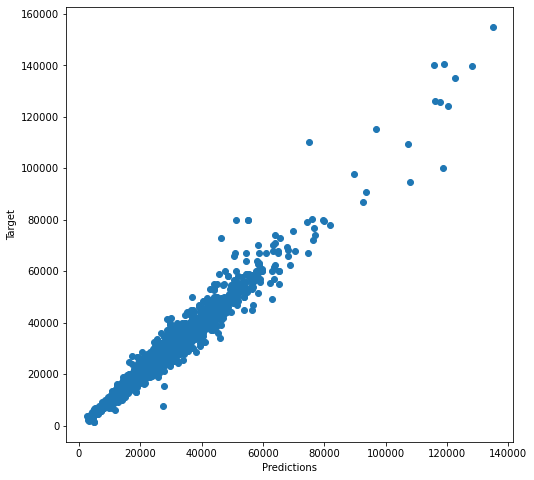

In [93]:
plt.figure(figsize=(8, 8))
plt.scatter(rfr_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')